In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

In [5]:
df = pd.read_csv("adult.csv")

In [6]:
data = [df]
print (df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

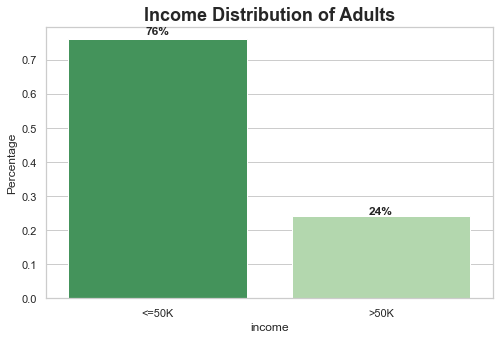

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [12]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


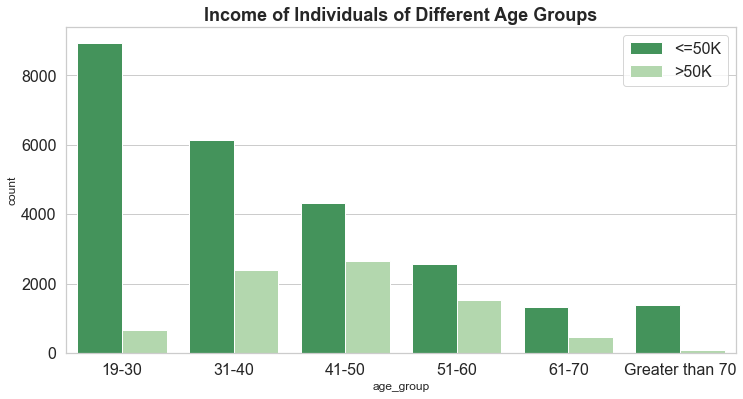

In [13]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


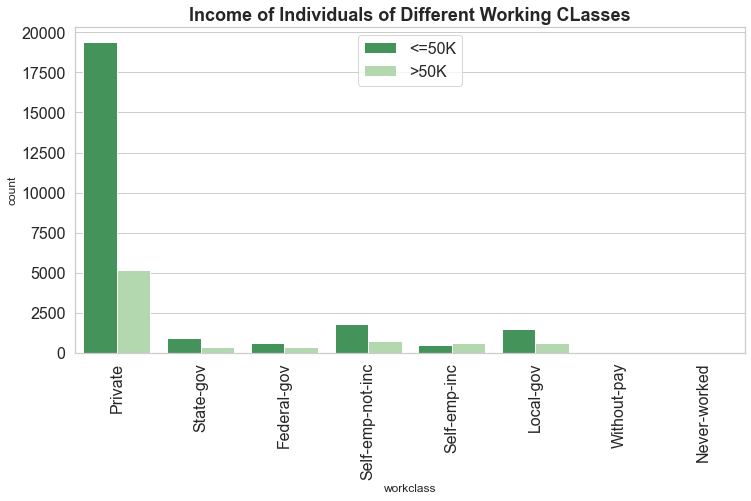

In [14]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


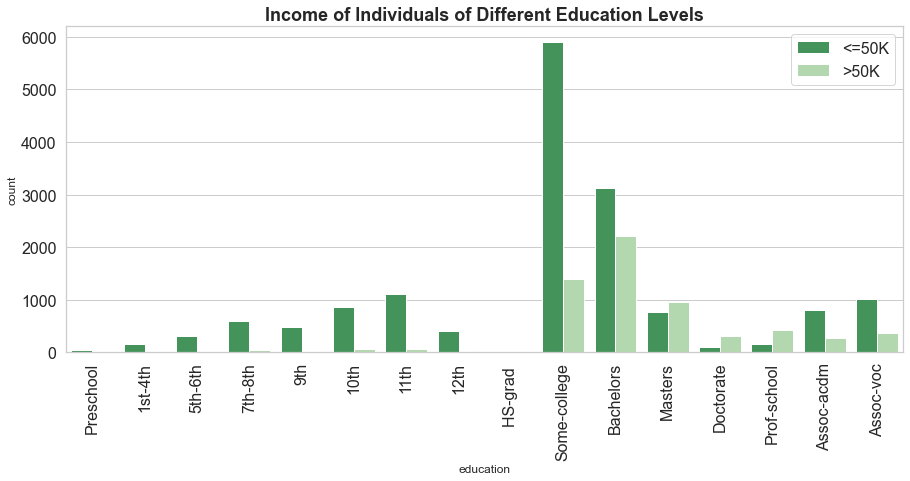

In [15]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['education'], hue = df['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


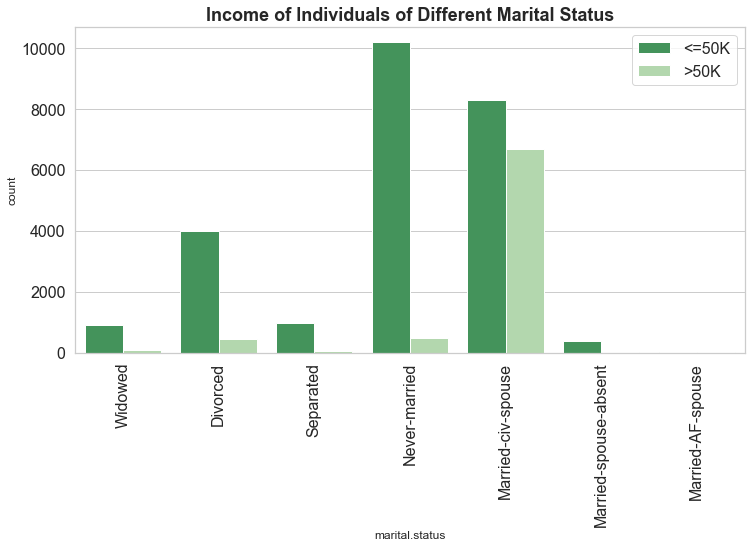

In [16]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['marital.status'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


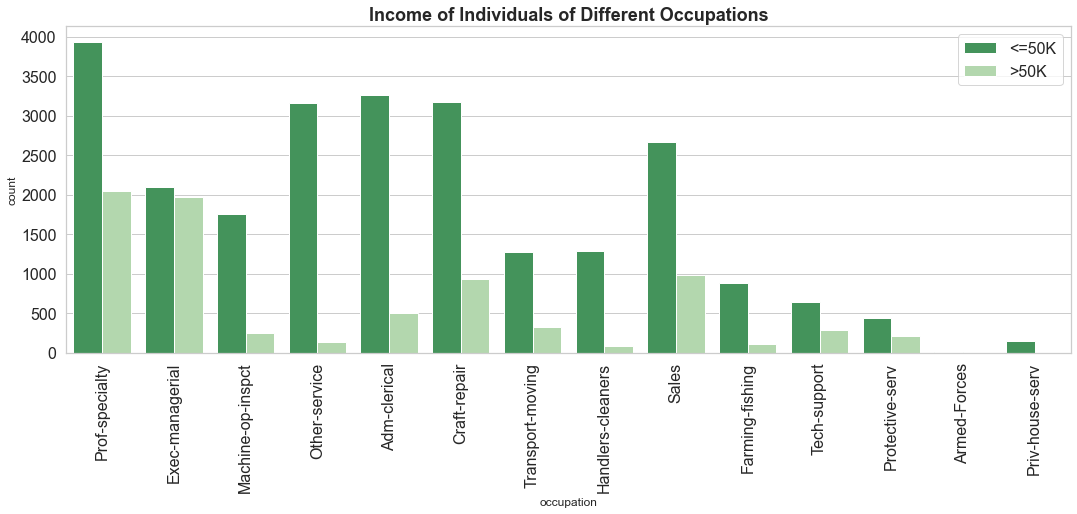

In [17]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


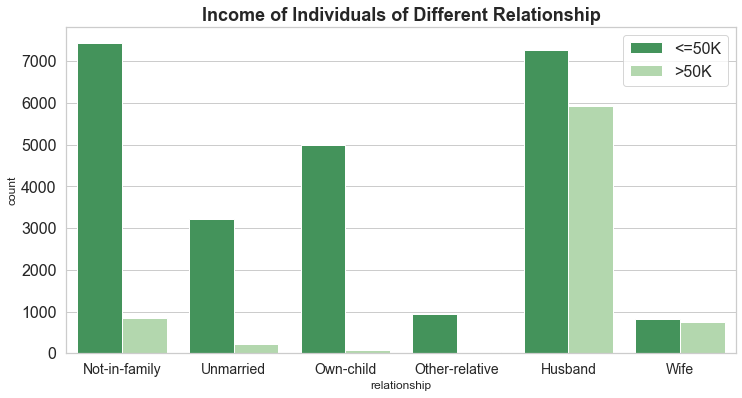

In [18]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['relationship'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


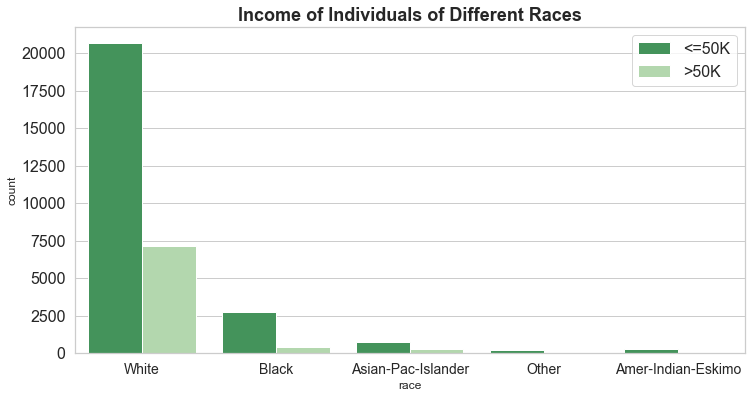

In [19]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['race'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


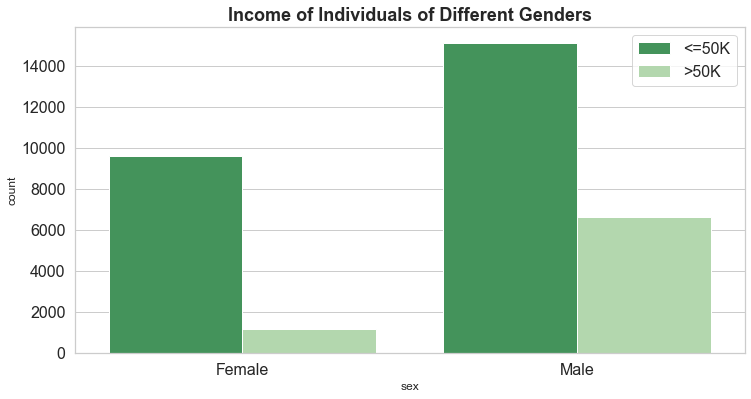

In [20]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [21]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

No handles with labels found to put in legend.


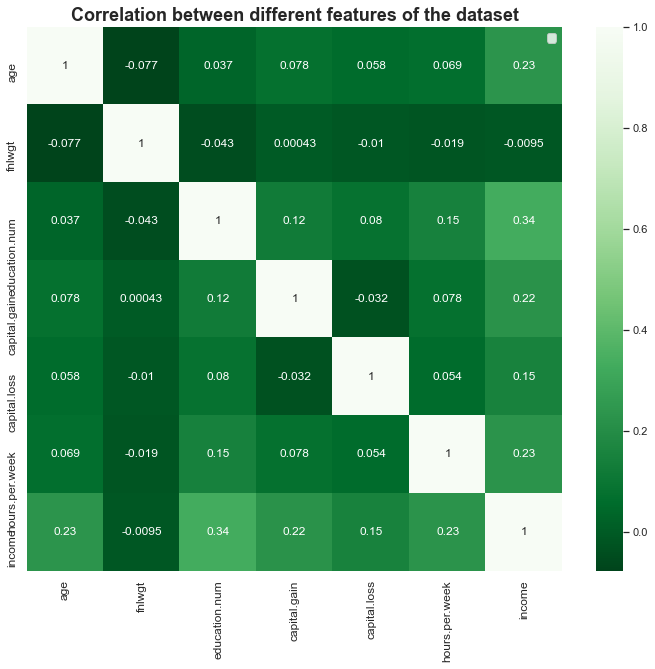

In [22]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [23]:
df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [24]:
df.drop('age_group', inplace = True, axis = 1)

In [25]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [27]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

In [28]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [29]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [30]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [31]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [32]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))


<ipython-input-27-d2fc7132f445>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training time (Log Reg using Gradient descent):572.4671993255615 seconds
Learning rate: 0.1
Iteration: 100000


In [33]:
result = sigmoid(x, theta)

In [34]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


24.080955744602438

In [35]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

<ipython-input-27-d2fc7132f445>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training time (Log Reg using MLE):507.93115234375seconds
Learning rate: 0.1
Iteration: 100000


In [36]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


<ipython-input-27-d2fc7132f445>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


78.94720678111852

In [37]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [38]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8013102671716654


In [39]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8028558268079227
2 0.8037770612620913
3 0.8077690772301551
4 0.7951788730231844
5 0.8096115461384923
6 0.7996315062183326
7 0.8027022877322278
8 0.8028558268079227
9 0.8033164440350069
10 0.8037770612620913
11 0.8023952095808383
12 0.8089973898357132
13 0.7996315062183326
14 0.799324428066943
15 0.8002456625211116
16 0.8028558268079227
17 0.8046982957162598
18 0.8082296944572394
19 0.7951788730231844
20 0.8057730692461231
21 0.8085367726086289
22 0.7942576385690158
23 0.7996315062183326
24 0.8005527406725012


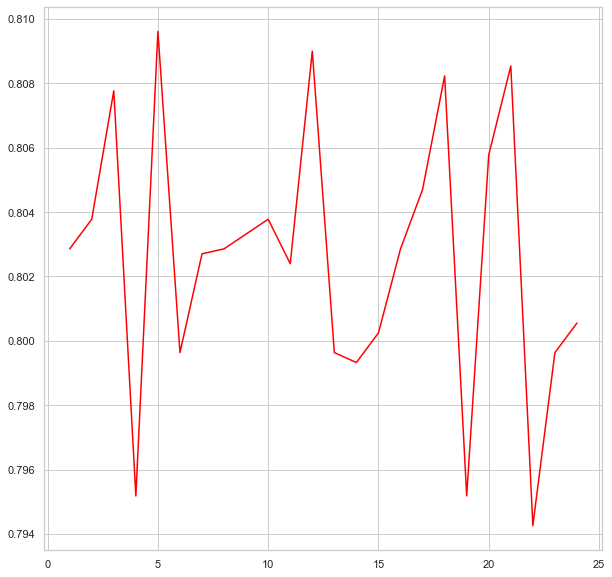

In [40]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [41]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8096115461384923
0.8089973898357132
0.8082296944572394
0.8085367726086289
